
# Titanic: Machine Learning from Disaster

In this activity, we'll analyze the Titanic dataset and build a predictive model to determine survival outcomes. We'll guide you through the process step by step using Google Colab.

## Overview

This is the legendary [Titanic ML competition](https://www.kaggle.com/competitions/titanic) – the best, first challenge for you to dive into ML competitions.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Data Description

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

## Files

The data has been split into two groups:

    training set (train.csv)
    Real data (real.csv)



## Setup:

> Before we start, let's set up the environment in **colab**

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score




## Load Data




Let's load the Titanic dataset into our Colab environment.

In [ ]:

# URL of the train dataset
train_url = "https://github.com/ML-Course-2025/session3/raw/refs/heads/main/datasets/titanic/train.csv"

# Load train dataset
train_data = pd.read_csv(train_url)



In [ ]:
# URL of the real dataset
real_data_url = "https://github.com/ML-Course-2025/session3/raw/refs/heads/main/datasets/titanic/real.csv"

# Load real dataset
real_data = pd.read_csv(real_data_url)

## Print numberr of passengers in train dataset

In [4]:
print('# of passengers in train dataset: ' + str(len(train_data)))

# of passengers in train dataset: 891


> Out of the total 1317 passengers, the count of 891 individuals represents about 67% of the entire passenger population. [Ref](https://titanicfacts.net/titanic-passengers/)


## Data Analysis


### Number of passengers Survived

<Axes: xlabel='Survived', ylabel='count'>

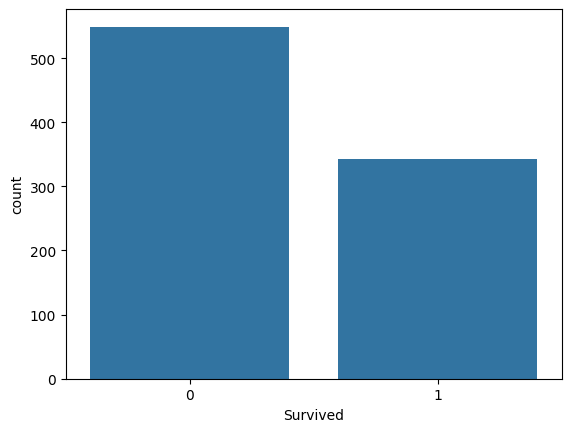

In [5]:
sns.countplot(x = 'Survived', data = train_data)

**Seaborn (imported as sns),** is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is particularly useful for visualizing data from Pandas DataFrames and NumPy arrays.

The code `sns.countplot(x='Survived', data=train_data)` is using Seaborn to create a count plot based on the 'Survived' column from the DataFrame named 'train'.

Here's a breakdown of what each part does:

- `sns.countplot`: This is a function provided by Seaborn that creates a count plot. A count plot shows the counts of observations in each category of a categorical variable.

- `x='Survived'`: This specifies the variable to be plotted on the x-axis of the count plot. In this case, it's the 'Survived' column from the DataFrame.

- `data=train_data`: This specifies the DataFrame from which the data for plotting is taken. In this case, it's the 'train' DataFrame.

So, the count plot created by this code will display the number of occurrences of each category in the 'Survived' column of the 'train' DataFrame. The x-axis will represent the categories of 'Survived' (likely 0 for not survived and 1 for survived), and the y-axis will represent the count of occurrences of each category.



### Number of passengers Survived based on Passenger Class






<Axes: xlabel='Survived', ylabel='count'>

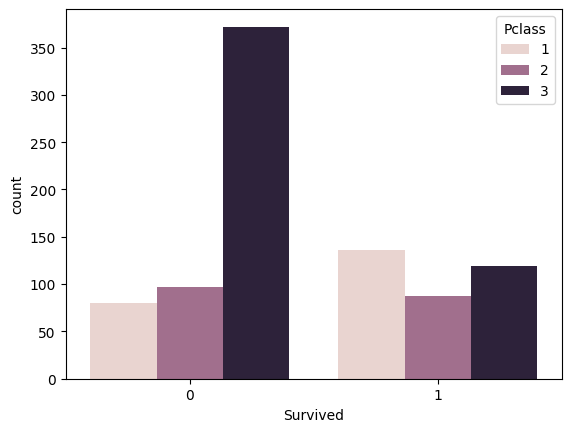

In [6]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)


The code `sns.countplot(x='Survived', hue='Pclass', data=train_data)` is using Seaborn to create a count plot based on the 'Survived' column from the DataFrame named 'train', with further differentiation based on the 'Pclass' column.

Here's a breakdown of what each part does:

- `sns.countplot`: This is a function provided by Seaborn that creates a count plot. A count plot shows the counts of observations in each category of a categorical variable.

- `x='Survived'`: This specifies the variable to be plotted on the x-axis of the count plot. In this case, it's the 'Survived' column from the DataFrame.

- `hue='Pclass'`: This parameter allows further differentiation of the data based on the categories of another variable, in this case, 'Pclass' (passenger class). It separates the count bars by the different categories of 'Pclass', showing how survival varies within each passenger class.

- `data=train_data`: This specifies the DataFrame from which the data for plotting is taken. In this case, it's the 'train' DataFrame.

So, the count plot created by this code will display the number of occurrences of each category in the 'Survived' column of the 'train' DataFrame, further differentiated by the categories of the 'Pclass' column. The x-axis will represent the categories of 'Survived' (likely 0 for not survived and 1 for survived), and the count bars will be separated by the different passenger classes.

**"hue"** refers to a parameter that allows you to introduce an additional categorical variable to differentiate or group the data in a plot. When you specify a hue in a plot, it means you want to separate the data based on the categories of that variable.

In seaborn, the "hue" parameter is commonly used in functions like sns.countplot(), sns.scatterplot(), sns.barplot(), and many others to provide additional insight into the data by visualizing how the relationship between variables varies across different categories of the hue variable.

For example, if you have a dataset of passengers on the Titanic and you want to create a count plot of survived vs. not survived, you could use 'Survived' as your main variable on the x-axis and specify 'Pclass' as the hue. This would result in separate bars for each survival status (0 or 1), with each bar further broken down by passenger class (1st, 2nd, 3rd).

In summary, the "hue" parameter allows you to add a layer of information to your plot by showing how the relationship between variables changes across the categories of the hue variable.


### Frequency of passengers group by Age





<Axes: ylabel='Frequency'>

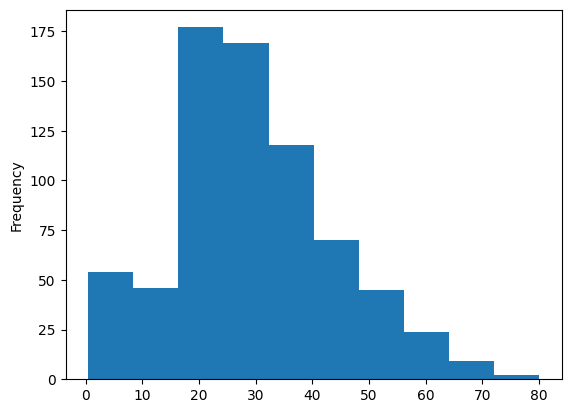

In [7]:
train_data['Age'].plot.hist()

The code `train_data['Age'].plot.hist()` generates a histogram of the 'Age' column in the DataFrame `train`. This histogram represents the distribution of ages among the passengers in the dataset.

Here's a breakdown of the code:
- `train_data['Age']`: This selects the 'Age' column from the DataFrame `train`.
- `.plot.hist()`: This method is used to create a histogram plot of the selected data. The `.plot` indicates that we're using the plotting functionality of pandas, and `.hist()` specifically generates a histogram.

So, when you run `train['Age'].plot.hist()`, it will display a histogram showing the distribution of ages among the passengers in the `train` DataFrame. Each bar in the histogram represents a range of ages, and the height of the bar indicates the frequency (or count) of passengers falling within that age range.


### Frequency of passengers group by Fare





<Axes: ylabel='Frequency'>

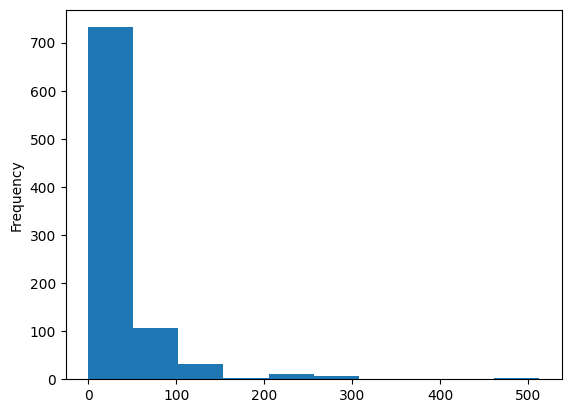

In [8]:
train_data['Fare'].plot.hist()

`train_data['Fare'].plot.hist()`generates a histogram of the 'Fare' column in the DataFrame `train`.
"Fares" refers to the prices or charges paid by passengers for transportation services, such as tickets for a journey on a ship, train, airplane, or other modes of transportation. In the context of the Titanic dataset or analysis, "fares" specifically refers to the amounts paid by passengers for their tickets for the voyage on the Titanic.


### Train Dataset Information





In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



### Number of siblings / spouses aboard the Titanic





<Axes: xlabel='SibSp', ylabel='count'>

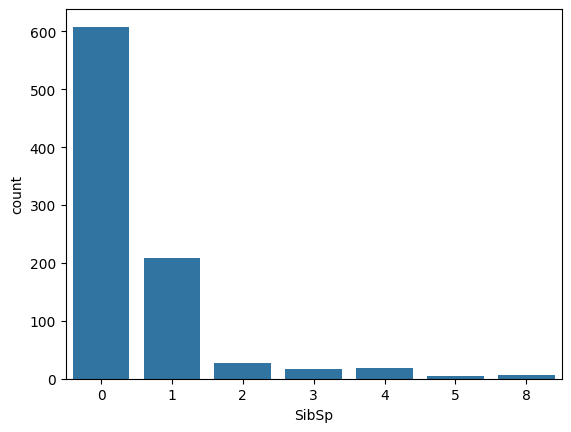

In [10]:
sns.countplot(x = 'SibSp', data = train_data)


### Check for NULL values in training set





In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Heatmap for NULL values

The code `sns.heatmap(train.isnull())` generates a heatmap using the Seaborn library to visualize missing (null) values in the `train` DataFrame. Each cell in the heatmap represents a value in the DataFrame, with missing values indicated by a distinct color. This visualization helps to identify patterns and concentrations of missing data across different columns or features in the dataset.





<Axes: >

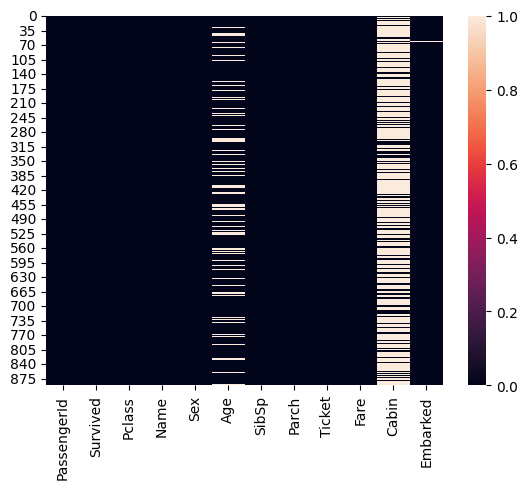

In [12]:
sns.heatmap(train_data.isnull())


### Passenger Class vs Age

The code `sns.boxplot(x='Pclass', y='Age', data=train)` creates a boxplot using the Seaborn library. In this plot:

- The x-axis represents the 'Pclass' (Passenger Class) feature, which categorizes passengers into different socio-economic classes (1st, 2nd, or 3rd).
- The y-axis represents the 'Age' feature, indicating the age of passengers.
- Each box in the plot represents the interquartile range (IQR) of ages for passengers belonging to a particular passenger class.
- The horizontal line inside each box represents the median age of passengers in that class.
- Any outliers, which are values that fall significantly beyond the whiskers of the box, are plotted individually as points.

This visualization helps to understand the distribution of ages among passengers in different passenger classes and to identify potential outliers or differences in age distribution across classes.






<Axes: xlabel='Pclass', ylabel='Age'>

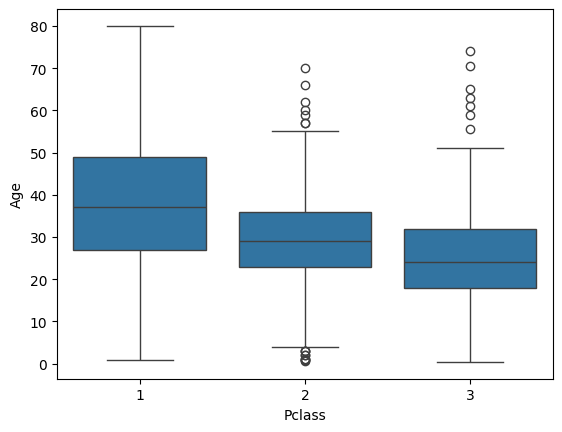

In [13]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train_data)


## Data Preprocessing


### Train Data

In [14]:
gender = pd.get_dummies(train_data['Sex'], drop_first = True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)
pcl = pd.get_dummies(train_data['Pclass'],drop_first=True)

The code uses the `pd.get_dummies()` function from the Pandas library to convert categorical variables into dummy/indicator variables. Here's what each line of code is doing:

1. `gender = pd.get_dummies(train['Sex'], drop_first=True)`: This line creates dummy variables for the 'Sex' column in the DataFrame `train`. It converts the 'Sex' column into two columns: one for male (1 or 0) and one for female (1 or 0). The `drop_first=True` parameter drops the first dummy column to avoid multicollinearity.

2. `embark = pd.get_dummies(train['Embarked'], drop_first=True)`: This line creates dummy variables for the 'Embarked' column in the DataFrame `train`. It converts the 'Embarked' column into dummy variables for the different ports of embarkation. The `drop_first=True` parameter drops the first dummy column to avoid multicollinearity.

3. `pcl = pd.get_dummies(train['Pclass'], drop_first=True)`: This line creates dummy variables for the 'Pclass' column in the DataFrame `train`. It converts the 'Pclass' column into dummy variables for the different passenger classes. The `drop_first=True` parameter drops the first dummy column to avoid multicollinearity.

After executing these lines of code, the `gender`, `embark`, and `pcl` DataFrames will contain the dummy variables for the 'Sex', 'Embarked', and 'Pclass' columns, respectively, which can be used for further analysis or modeling.

> Converting categorical variables into dummy or indicator variables, we're essentially transforming categorical data into a format that can be used for machine learning algorithms. Let's break it down:

1. **Categorical Variables**: These are variables that represent categories or groups and typically take on a limited, fixed number of possible values. Examples include gender (male/female), education level (high school/college/graduate), and vehicle type (sedan/SUV/truck).

2. **Dummy Variables**: Dummy variables are binary (0 or 1) variables that represent the presence or absence of a particular category in a categorical variable. Each category in the original variable is transformed into its own dummy variable. If a data point belongs to a specific category, its corresponding dummy variable is set to 1; otherwise, it's set to 0. Dummy variables are sometimes referred to as indicator variables.

3. **Conversion Process**: The process of converting categorical variables into dummy variables involves creating new binary columns in the dataset, with each column representing a unique category in the original categorical variable. For example, if the original categorical variable is "Gender" with values "Male" and "Female", it would be transformed into two dummy variables: "Male" and "Female".

4. **Usage in Machine Learning**: Many machine learning algorithms require numerical inputs, and categorical variables in their raw form cannot be directly used. By converting categorical variables into dummy variables, we transform them into a numerical format that can be incorporated into machine learning models.

Overall, converting categorical variables into dummy variables allows us to include categorical data in machine learning analyses, enabling us to leverage valuable information from these variables in predictive modeling tasks.

The `drop_first=True` parameter in the context of creating dummy variables is used to mitigate the issue of multicollinearity. Let's break down what this means:

1. **Multicollinearity**: Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated with each other. This correlation can lead to instability in the model estimates, making it difficult to interpret the individual effects of each predictor variable. In extreme cases, multicollinearity can even render the model coefficients unreliable.

2. **Dummy Variable Trap**: When creating dummy variables from a categorical variable with \(k\) categories, one typically creates \(k-1\) dummy variables. This is because including all \(k\) dummy variables would result in perfect multicollinearity, where the values of the dummy variables can be perfectly predicted from each other. For example, if we have dummy variables for "male" and "female" genders, knowing the value of one (e.g., "male") automatically implies the value of the other (e.g., "female").

3. **drop_first=True**: By setting `drop_first=True`, we drop the first category when creating dummy variables. This means that we only create \(k-1\) dummy variables instead of \(k\). Dropping the first category breaks the perfect multicollinearity because we don't include redundant information. The omitted category becomes the reference category, and the presence of any other category is indicated by the presence of its corresponding dummy variable.

4. **Avoiding Redundancy**: By dropping the first category, we avoid redundancy and maintain linear independence among the predictor variables. This helps to ensure the stability and interpretability of the regression coefficients in the model.

Setting `drop_first=True` when creating dummy variables helps to prevent multicollinearity by omitting one of the categories, thereby improving the robustness and reliability of the regression model.

> When we include both categories (dummy variables) in a regression model, such as "Male" and "Female," the presence of one category perfectly predicts the absence of the other. In statistical terms, this is known as perfect multicollinearity.

Here's why it's a problem:

1. **Redundancy**: Including both categories introduces redundant information into the model. If we have a dummy variable for "Male" and "Female," knowing the value of one (e.g., "Male" = 1) automatically implies the value of the other (e.g., "Female" = 0). In other words, if a passenger is not male, they must be female, and vice versa.

2. **Singular Matrix**: Perfect multicollinearity leads to a singular or nearly singular design matrix, making it impossible for the regression algorithm to find a unique solution for the coefficients. This can result in computational issues and unstable coefficient estimates.

3. **Interpretability**: Including redundant variables makes it challenging to interpret the coefficients of the model. Each coefficient represents the change in the dependent variable associated with a one-unit change in the predictor variable, holding all other variables constant. However, when variables are perfectly collinear, their coefficients become undefined or unstable.

By dropping one of the categories (using `drop_first=True`), we avoid the problem of perfect multicollinearity and ensure the stability and interpretability of the regression model. It's a standard practice in regression analysis to prevent redundant information and maintain the reliability of the model estimates.

In [15]:
print("Gender Dummy Variables:")
print(gender.head())  # Display the first few rows of the 'sex' DataFrame

print("\nEmbarked Dummy Variables:")
print(embark.head())  # Display the first few rows of the 'embark' DataFrame

print("\nPclass Dummy Variables:")
print(pcl.head())  # Display the first few rows of the 'pcl' DataFrame


Gender Dummy Variables:
    male
0   True
1  False
2  False
3  False
4   True

Embarked Dummy Variables:
       Q      S
0  False   True
1  False  False
2  False   True
3  False   True
4  False   True

Pclass Dummy Variables:
       2      3
0  False   True
1  False  False
2  False   True
3  False  False
4  False   True



### Concat new features in train data





In [16]:
train_data = pd.concat([train_data,gender,embark,pcl],axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False,True,False,True



The `pd.concat()` function is used to concatenate (join together) pandas objects along a particular axis. In this case, it concatenates the DataFrame `train` with the DataFrames `sex`, `embark`, and `pcl` along the column axis (`axis=1`), meaning the concatenation happens horizontally.

After concatenation, the resulting DataFrame is assigned back to the variable `train`. The `head()` method is then called on this DataFrame to display the first few rows, allowing you to inspect the changes made after concatenation.

Here's what each part of the code does:

- `pd.concat([train, sex, embark, pcl], axis=1)`: Concatenates the DataFrames `train`, `sex`, `embark`, and `pcl` along the column axis, effectively adding the dummy variables derived from the 'Sex', 'Embarked', and 'Pclass' columns to the original DataFrame `train`.

- `train.head()`: Displays the first few rows of the concatenated DataFrame `train` after the operation, providing a quick overview of the changes made.

This operation allows you to add the dummy variables for 'Sex', 'Embarked', and 'Pclass' to the original DataFrame `train`, incorporating them as additional features for further analysis or modeling.


### Dropping columns from train dataset





In [17]:
train_data.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
train_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


The code drops several columns from the `train` DataFrame using the `drop()` method. Here's a breakdown of what each part does:

1. `train.drop([...], axis=1, inplace=True)`: This drops the specified columns along the columns axis (axis=1) from the DataFrame. The list of columns to drop includes 'Pclass', 'Sex', 'Embarked', 'Cabin', 'PassengerId', 'Name', and 'Ticket'. The `inplace=True` parameter ensures that the changes are made directly to the original DataFrame `train`.

2. `train.head()`: This displays the first few rows of the modified DataFrame `train` after the specified columns have been dropped.

Overall, this code snippet removes the specified columns from the DataFrame `train` and then displays the modified DataFrame with the `head()` function.

The dummy variables 'male', 'Q', 'S', '2', and '3' have been successfully created and concatenated to the DataFrame. These dummy variables represent the encoded information from the original categorical variables 'Sex', 'Embarked', and 'Pclass'. Here's a breakdown of what each of these dummy variables represents:

- 'male': This dummy variable indicates the gender of the passenger. It is 1 if the passenger is male and 0 if the passenger is female.

- 'Q' and 'S': These dummy variables represent the port of embarkation. 'Q' indicates Queenstown, and 'S' indicates Southampton. They are 1 if the passenger embarked from the corresponding port and 0 otherwise.

- '2' and '3': These dummy variables represent the passenger class. '2' indicates second class, and '3' indicates third class. They are 1 if the passenger belongs to the corresponding class and 0 otherwise.

The original columns 'Sex', 'Embarked', and 'Pclass' have been effectively encoded into these dummy variables, allowing for easier analysis and modeling in machine learning tasks.

The `drop_first=True` parameter in the `pd.get_dummies()` function is designed to drop the first category of the categorical variable to avoid multicollinearity. However, in the case of the 'Embarked' variable, both 'Q' (Queenstown) and 'S' (Southampton) are kept after applying `drop_first=True`.

This behavior occurs because dropping the first category ('C' in this case) would still leave two categories ('Q' and 'S'), which are necessary for representing all the information about the 'Embarked' variable. If 'C' was dropped, then both 'Q' and 'S' would be represented by having '0' values for both, which might not accurately capture the information about the port of embarkation.

Therefore, dropping the first category in this scenario does not result in dropping either 'Q' or 'S'. It's important to consider the context of the data and the categorical variable when deciding whether to drop the first category.


### Check for NULL values





In [18]:
train_data.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
male          0
Q             0
S             0
2             0
3             0
dtype: int64


### Handling NULL values





In [19]:
train_values = {'Age': round(np.mean(train_data['Age']))}
train_data = train_data.fillna(value = train_values)
train_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


The code fills missing values in the 'Age' column of the DataFrame `train` with the rounded mean age value. Here's how it works:

1. `train_values = {'Age': round(np.mean(train['Age']))}`: This calculates the mean age from the 'Age' column of the DataFrame `train` using `np.mean()`, rounds it using `round()`, and stores it in a dictionary with the key 'Age'. This dictionary will be used to fill missing values in the 'Age' column.

2. `train = train.fillna(value=train_values)`: This fills missing values in the DataFrame `train` using the values specified in the `train_values` dictionary. Specifically, it fills missing values in the 'Age' column with the rounded mean age value calculated earlier.

3. `train.head()`: This displays the first few rows of the modified DataFrame `train` after filling missing values in the 'Age' column.

Overall, this code ensures that missing values in the 'Age' column are replaced with the rounded mean age value, allowing for a more complete dataset.

In [20]:
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']

These lines of code are preparing the data for machine learning tasks:

1. `X = train.drop('Survived', axis=1)`: This line creates a DataFrame `X` containing the features used for prediction. It removes the column `'Survived'` from the DataFrame `train` along the specified axis (axis=1, indicating columns). The resulting DataFrame `X` contains all columns from `train` except the `'Survived'` column.

2. `y = train['Survived']`: This line creates a Series `y` containing the target variable (labels) that the model will try to predict. It selects the column `'Survived'` from the DataFrame `train` and assigns it to `y`.

These steps are common in machine learning workflows, where you separate the features used for prediction (X) from the target variable (y). This allows you to train a model using the features to predict the target variable.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

This line of code splits the dataset into training and testing sets:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
```

Here's what each part does:

- `X_train`: This variable contains the features (input data) used for training the model.
- `X_test`: This variable contains the features used for testing the model's performance.
- `y_train`: This variable contains the corresponding labels (target variable) for the training set.
- `y_test`: This variable contains the corresponding labels for the testing set.

The `train_test_split` function from Scikit-Learn is used to split the dataset into training and testing sets. The parameters used are:

- `X`: The features DataFrame.
- `y`: The target variable Series.
- `test_size`: The proportion of the dataset to include in the testing set. Here, it's set to 0.3, meaning 30% of the data will be used for testing, and the remaining 70% for training.
- `random_state`: This parameter ensures reproducibility of the results. Setting it to a specific value (here, 1) ensures that the same random split is obtained every time the code is run.

## Define Model

In [22]:
logmodel = LogisticRegression(solver='liblinear')

The code initializes a logistic regression model with the solver parameter set to 'liblinear'. This solver is suitable for small datasets and is often used for binary classification problems. Here's a breakdown of the code:

```python
logmodel = LogisticRegression(solver='liblinear')
```

- `LogisticRegression`: This is a class from the scikit-learn library used to perform logistic regression, which is a type of regression analysis used for predicting the probability of a binary outcome.
  
- `solver='liblinear'`: This parameter specifies the algorithm to use in the optimization problem. In this case, 'liblinear' is chosen, which is suitable for small datasets and binary classification problems. It works well for datasets with a large number of features.

After initializing the logistic regression model, you can proceed to train it on your training data and then use it to make predictions on new data.

In [23]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

# Fit the logistic regression model
logmodel.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

The code `logmodel.fit(X_train, y_train)` is used to train (fit) the logistic regression model on the training data. Here's what each part of the code does:

- `logmodel`: This is the logistic regression model that was previously initialized using `LogisticRegression()`.

- `fit(X_train, y_train)`: This method is called on the logistic regression model (`logmodel`) and is used to train the model on the provided training data (`X_train` and `y_train`). During training, the model learns the relationships between the features (`X_train`) and the target variable (`y_train`), so it can later make predictions.

After this line of code executes successfully, the logistic regression model (`logmodel`) will have learned from the training data, and you can then use it to make predictions on new data or evaluate its performance on test data.

The logistic regression model expects all feature names to be strings, but if the input data (`X_train`) contains a mix of integer and string column names, you can convert all column names to strings using `astype(str)` before fitting the model.

```python
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

# Fit the logistic regression model
logmodel.fit(X_train, y_train)
```

By converting the column names to strings, you ensure that all feature names are consistent and compatible with the logistic regression model. After performing this conversion, you can proceed to fit the model to the training data without encountering the TypeError.

In [24]:
X_test.columns = X_test.columns.astype(str)
predictions = logmodel.predict(X_test)


## Model Evaluation




### Classification Report



In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.81      0.65      0.72       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



Here's the interpretation of the classification report:

- **Precision**: Precision measures the proportion of true positive predictions among all positive predictions. For class 0 (non-survivors), the precision is 0.77, meaning that among all instances predicted as non-survivors, 77% were correctly classified. For class 1 (survivors), the precision is 0.81, indicating that among all instances predicted as survivors, 81% were correctly classified.

- **Recall**: Recall, also known as sensitivity or true positive rate, measures the proportion of true positives that were correctly identified. For class 0, the recall is 0.88, meaning that 88% of the actual non-survivors were correctly classified. For class 1, the recall is 0.65, indicating that 65% of the actual survivors were correctly classified.

- **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when there is an uneven class distribution. The F1-score ranges from 0 to 1, where a score of 1 indicates perfect precision and recall. The weighted average F1-score in this report is 0.78, indicating good overall performance.

- **Support**: Support refers to the number of occurrences of each class in the test dataset.

- **Accuracy**: Accuracy is the proportion of correctly classified instances among all instances. The accuracy in this report is 0.78, meaning that 78% of the instances were correctly classified.

- **Macro Avg**: Macro average calculates the unweighted mean of precision, recall, and F1-score across all classes. In this report, the macro average F1-score is 0.77.

- **Weighted Avg**: Weighted average calculates the weighted mean of precision, recall, and F1-score, where each score is weighted by the number of true instances for each label. In this report, the weighted average F1-score is 0.78, which takes into account the class imbalance.


### Confusion Matrix





In [26]:
print(confusion_matrix(y_test, predictions))

[[135  18]
 [ 40  75]]


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

Here's how to interpret the confusion matrix:

```
[[True Negative  False Positive]
 [False Negative True Positive]]
```

- **True Negative (TN)**: The number of instances correctly classified as negative (class 0).
- **False Positive (FP)**: The number of instances incorrectly classified as positive (class 1) when they are actually negative.
- **False Negative (FN)**: The number of instances incorrectly classified as negative when they are actually positive.
- **True Positive (TP)**: The number of instances correctly classified as positive.

The confusion matrix provides insight into the performance of the classifier by showing where it is making mistakes.

You can interpret it as follows:
- The top-left value represents the number of true negatives (non-survivors correctly predicted as non-survivors).
- The top-right value represents the number of false positives (non-survivors incorrectly predicted as survivors).
- The bottom-left value represents the number of false negatives (survivors incorrectly predicted as non-survivors).
- The bottom-right value represents the number of true positives (survivors correctly predicted as survivors).

To determine if a confusion matrix is good or bad, we need to analyze it in the context of the problem being solved and the specific goals of the classification task.

In a confusion matrix, we have four values:

- True Negative (TN): 135
- False Positive (FP): 18
- False Negative (FN): 40
- True Positive (TP): 75

Here's how we can interpret it:

- The model correctly predicted 135 instances as negative (non-survivors).
- The model incorrectly predicted 18 instances as positive (survivors) when they were actually negative.
- The model incorrectly predicted 40 instances as negative (non-survivors) when they were actually positive.
- The model correctly predicted 75 instances as positive (survivors).

To determine if this confusion matrix is good or bad:
- We need to consider the specific objectives of the classification task. For example, if the goal is to identify survivors accurately, then a higher number of true positives (TP) and lower number of false negatives (FN) would be desirable.
- We can calculate performance metrics such as accuracy, precision, recall, and F1-score to get a more comprehensive understanding of the model's performance.



### Accuracy





In [27]:
print(accuracy_score(y_test, predictions))

0.7835820895522388


The accuracy score is a measure of the overall correctness of the model's predictions. It is calculated as the ratio of correctly predicted instances to the total number of instances.

Given the confusion matrix you provided earlier:

- True Negative (TN): 135
- False Positive (FP): 18
- False Negative (FN): 40
- True Positive (TP): 75

The total number of instances is \(TN + FP + FN + TP = 135 + 18 + 40 + 75 = 268\).

The accuracy score is calculated as:

$$
\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} = \frac{TP + TN}{Total}
$$

Substituting the values:

$$
\text{Accuracy} = \frac{75 + 135}{268} = \frac{210}{268} \approx 0.78358209
$$

So, the accuracy score is approximately \(0.784\), or \(78.4\%\) when rounded to two decimal places. This means that the model correctly predicts the survival status of passengers in the test set with an accuracy of \(78.4\%\).

To improve the accuracy of the model, you can consider several strategies:

1. **Feature Engineering**: Analyze and preprocess your features to extract more meaningful information. This may involve imputing missing values, scaling numerical features, encoding categorical variables, or creating new features.

2. **Model Selection**: Try different machine learning algorithms and models. Experiment with different hyperparameters for each model to find the combination that yields the best results.

3. **Feature Selection**: Identify and select the most relevant features for your model. Eliminate features that may introduce noise or do not contribute significantly to the prediction.

4. **Hyperparameter Tuning**: Perform hyperparameter optimization using techniques like grid search or randomized search to find the best parameters for your model.

5. **Ensemble Methods**: Explore ensemble methods such as bagging, boosting, or stacking to combine the predictions of multiple models and improve overall performance.

6. **Cross-Validation**: Use cross-validation techniques to ensure that your model generalizes well to unseen data and to avoid overfitting.

7. **Data Augmentation**: If applicable, consider generating additional training data through techniques like data augmentation to increase the diversity of your dataset.

8. **Error Analysis**: Analyze the errors made by your model on the validation set to identify patterns and areas for improvement. This may involve examining misclassified instances or exploring the distribution of prediction probabilities.

By iteratively applying these strategies and evaluating the performance of your model, you can work towards achieving better accuracy for your classification task.


## Evaluating the Model Performance on Real Data






### Data Preprocessing

In [28]:
gender = pd.get_dummies(real_data['Sex'], drop_first = True)
embark = pd.get_dummies(real_data['Embarked'],drop_first=True)
pcl = pd.get_dummies(real_data['Pclass'],drop_first=True)


### Concat new features in test data





In [29]:
real_data = pd.concat([real_data,gender,embark,pcl],axis=1)
real_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,True,True,False,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,True,True,False,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,True,False,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True,False,True



### Dropping columns from train dataset





In [30]:
real_data.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)


### Check for NULL values





In [31]:
real_data.isnull().sum()

Age      86
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
2         0
3         0
dtype: int64


### Handling NULL values





In [32]:
temp_values = {'Age':round(np.mean(real_data['Age'])), 'Fare':round(np.mean(real_data['Fare']))}
real_data = real_data.fillna(value = temp_values)
real_data.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,True,True,False,False,True
1,47.0,1,0,7.0000,False,False,True,False,True
2,62.0,0,0,9.6875,True,True,False,True,False
3,27.0,0,0,8.6625,True,False,True,False,True
4,22.0,1,1,12.2875,False,False,True,False,True



### Predictions





In [33]:
real_data.columns = real_data.columns.astype(str)
test_predictions = logmodel.predict(real_data)

To predict the target variable for the test dataset using the trained logistic regression model `logmodel`, you can use the `predict()` method as follows:

```python
test_predictions = logmodel.predict(real_data)
```

Replace `test` with the features of your test dataset. After running this code, `test_predictions` will contain the predicted values for the target variable based on the features in the `test` dataset.

In [34]:
test_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Conclusion:

While there have been other attempts to solve this competition with higher accuracy, we opted for [this approach](https://github.com/risx3/ML-Logistic-Regression-Titanic/blob/main/titanic.ipynb) due to its simplicity and ease of interpretation.
for a better quality code check [this tutorial](https://www.kaggle.com/code/alexisbcook/titanic-tutorial)